# Support Vector Machines Lab

In this lab we will explore several datasets with SVMs. The assets folder contains several datasets (in order of complexity):

1. Breast cancer
- Spambase
- Car evaluation
- Mushroom

For each of these a `.names` file is provided with details on the origin of data.

In [1]:
import pandas as pd

# Exercise 1: Breast Cancer



## 1.a: Load the Data
Use `pandas.read_csv` to load the data and assess the following:
- Are there any missing values? (how are they encoded? do we impute them?)
- Are the features categorical or numerical?
- Are the values normalized?
- How many classes are there in the target?

Perform what's necessary to get to a point where you have a feature matrix `X` and a target vector `y`, both with only numerical entries.

In [2]:
data = pd.read_csv('../../assets/datasets/breast_cancer.csv',na_values=['?'])

In [3]:
data.dropna(inplace=True)

data.Class = data.Class.map(lambda x: 0 if x == 2 else 1)
data.drop('Sample_code_number', inplace=True, axis = 1)

In [4]:
data.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0


## 1.b: Model Building

- What's the baseline for the accuracy?
- Initialize and train a linear svm. What's the average accuracy score with a 3-fold cross validation?
- Repeat using an rbf classifier. Compare the scores. Which one is better?
- Are your features normalized? if not, try normalizing and repeat the test. Does the score improve?
- What's the best model?
- Print a confusion matrix and classification report for your best model using:
        train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

**Check** to decide which model is best, look at the average cross validation score. Are the scores significantly different from one another?

In [5]:
X = data.drop('Class', axis = 1)
y = data.Class

In [6]:
# Baseline accuracy
y.value_counts()/len(y)

0    0.650073
1    0.349927
Name: Class, dtype: float64

In [7]:
# Baseline Accuray by Dummy Classifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

clf = DummyClassifier(strategy='most_frequent', random_state=0, constant=None)
clf.fit(X_train, y_train)

print "Baseline Accuracy : ", clf.score(X_test, y_test)

Baseline Accuracy :  0.650442477876


In [8]:
# SVM with Linear classifier

from sklearn.svm import SVC

model = SVC(kernel='linear', C=0.5)
# model.fit(X_train, y_train)

scores = cross_val_score(model, X, y, cv=3)
print("3 fold cross_val_score - Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std()* 2))

3 fold cross_val_score - Accuracy: 0.965 (+/- 0.04)


In [9]:
# RBF classfier
from sklearn.svm import SVC

modelrbf = SVC(kernel='rbf', C=0.5)
modelrbf.fit(X_train, y_train)

scores = cross_val_score(modelrbf, X, y, cv=3)
print("3 fold cross_val_score - Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()* 2))

3 fold cross_val_score - Accuracy: 0.95 (+/- 0.06)


In [10]:
# Normalising the features.   Note: Features are already normalised
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

norm = preprocessing.StandardScaler()
X_new = norm.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, stratify=y, test_size=0.33, random_state=42)

modelnorm = SVC(kernel='linear', C=0.5)
# modelnorm.fit(X_train, y_train)

scores = cross_val_score(modelnorm, X_new, y, cv=3)
print("3 fold cross_val_score - Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()* 2))

3 fold cross_val_score - Accuracy: 0.968 (+/- 0.032)


### The data is already normalised.  Model with RBF classifier is the best model

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
modelnorm.fit(X_train, y_train)
y_pred = modelnorm.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=[1,0])
confusion = pd.DataFrame(cm, index=['cancer', 'healthy'],
                         columns=['predicted_cancer','predicted_healthy'])

print confusion

print classification_report(y_test,y_pred)

         predicted_cancer  predicted_healthy
cancer                 76                  3
healthy                 5                142
             precision    recall  f1-score   support

          0       0.98      0.97      0.97       147
          1       0.94      0.96      0.95        79

avg / total       0.96      0.96      0.96       226



**Check:** Are there more false positives or false negatives? Is this good or bad?

### More false Positives than false negatives. 

## 1.c: Feature Selection

Use any of the strategies offered by `sklearn` to select the most important features.

Repeat the cross validation with only those 5 features. Does the score change?

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

modelrfe = SVC(kernel='rbf', C=0.5)

selector = SelectKBest(f_classif, k=5)
selected_data = selector.fit_transform(X, y)

kbest_columns = X.columns[selector.get_support()]
Xbest_K = pd.DataFrame(selected_data, columns=kbest_columns)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(Xbest_K, y, stratify=y, test_size=0.33, random_state=42)

model_k = SVC(kernel='rbf', C=0.5)
model_k.fit(X_train, y_train)

scores = cross_val_score(model_k, X_test, y_test, cv=3)
print("3 fold cross_val_score - Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()* 2))

y_pred = model_k.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=[1,0])
confusion = pd.DataFrame(cm, index=['cancer', 'healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
print confusion
print classification_report(y_test,y_pred)

3 fold cross_val_score - Accuracy: 0.95 (+/- 0.03)
         predicted_cancer  predicted_healthy
cancer                 78                  1
healthy                 6                141
             precision    recall  f1-score   support

          0       0.99      0.96      0.98       147
          1       0.93      0.99      0.96        79

avg / total       0.97      0.97      0.97       226



## 1.d: Learning Curves

Learning curves are useful to study the behavior of training and test errors as a function of the number of datapoints available.

- Plot learning curves for train sizes between 10% and 100% (use StratifiedKFold with 5 folds as cross validation)
- What can you say about the dataset? do you need more data or do you need a better model?

Automatically created module for IPython interactive environment


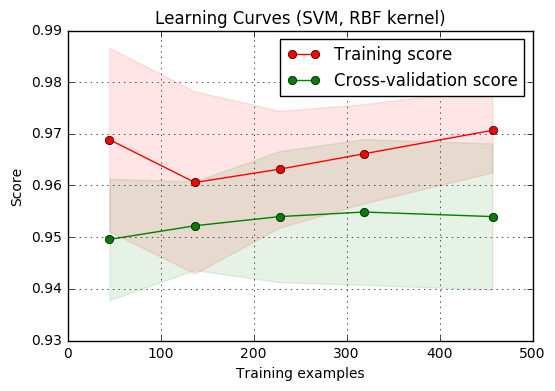

In [16]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X = Xbest_K

title = "Learning Curves (SVM, RBF kernel)"

cv = ShuffleSplit(n_splits=5, test_size=0.33, random_state=0)
model_k = SVC(kernel='rbf', C=0.5)

plot_learning_curve(model_k, title, X, y, train_sizes=[.1, .3, .5, .7, 1], cv=cv, n_jobs=4)
plt.show()

##  1.e: Grid Ssearch

Use the grid_search function to explore different kernels and values for the C parameter.

- Can you improve on your best previous score?
- Print the best parameters and the best score

In [17]:
from sklearn.model_selection import GridSearchCV
clf = SVC()
gs = GridSearchCV(clf, param_grid=[{'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel':['linear','rbf']}])
gs.fit(Xbest_K, y)
gs.best_params_


{'C': 0.1, 'kernel': 'linear'}

In [18]:
gs.best_score_

0.9619326500732065

# Exercise 2
Now that you've completed steps 1.a through 1.e it's time to tackle some harder datasets. But before we do that, let's encapsulate a few things into functions so that it's easier to repeat the analysis.

## 2.a: Cross Validation
Implement a function `do_cv(model, X, y, cv)` that does the following:
- Calculates the cross validation scores
- Prints the model
- Prints and returns the mean and the standard deviation of the cross validation scores

> Answer: see above

## 2.b: Confusion Matrix and Classification report
Implement a function `do_cm_cr(model, X, y, names)` that automates the following:
- Split the data using `train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)`
- Fit the model
- Prints confusion matrix and classification report in a nice format

**Hint:** names is the list of target classes

> Answer: see above

## 2.c: Learning Curves
Implement a function `do_learning_curve(model, X, y, sizes)` that automates drawing the learning curves:
- Allow for sizes input
- Use 5-fold StratifiedKFold cross validation

> Answer: see above

## 2.d: Grid Search
Implement a function `do_grid_search(model, parameters)` that automates the grid search by doing:
- Calculate grid search
- Print best parameters
- Print best score
- Return best estimator


> Answer: see above

In [19]:
def do_cv(model, X, y, cv):
    s = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
    print "Mean Cross Val Score with Std Dev:\t{:0.3} ± {:0.3}".format(s.mean().round(3), s.std().round(3))

model = SVC()
do_cv(model, Xbest_K, y, 3)

Mean Cross Val Score with Std Dev:	0.962 ± 0.018


In [20]:
def do_cm_cr(model, X, y, names):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred, labels=[1,0])
    confusion = pd.DataFrame(cm, index=names,
                             columns=['pred '+names[0], 'pred '+names[1]])
    print confusion
    print classification_report(y_test,y_pred)  

model = SVC(kernel='rbf', C=0.5)    
do_cm_cr(model, Xbest_K, y, ['Malignant','Benign'])

           pred Malignant  pred Benign
Malignant              78            1
Benign                  6          141
             precision    recall  f1-score   support

          0       0.99      0.96      0.98       147
          1       0.93      0.99      0.96        79

avg / total       0.97      0.97      0.97       226



In [21]:
def do_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# title = "Learning Curves (SVM, RBF kernel)"
# cv = ShuffleSplit(n_splits=5, test_size=0.33, random_state=0)
# model = SVC(kernel='rbf', C=0.5)

# plot_learning_curve(model, title, Xbest_K, y, (0.7, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/Users/Shreyas/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [23]:
def do_grid_search(model, X, y, parameters):
    gs = GridSearchCV(model, param_grid=parameters, cv=5)
    gs.fit(X, y)
    print gs.best_params_
    print gs.best_score_
    return gs.best_estimator_

model = SVC()
parameters = [{'C':[0.0001, 0.001, 0.01, 0.1,0.5, 1, 10, 100, 1000], 'kernel':['linear','rbf']}]
do_grid_search(model, Xbest_K, y, parameters)

{'kernel': 'linear', 'C': 0.001}
0.96046852123


SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Exercise 3
Using the functions above, analyze the Spambase dataset.

Notice that now you have many more features. Focus your attention on step C => feature selection

- Load the data and get to X, y
- Select the 15 best features
- Perform grid search to determine best model
- Display learning curves

In [24]:
spam = pd.read_csv('./../../assets/datasets/spambase.csv')
spam.head()
X = spam.drop('class', axis=1)
y = spam['class']
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [28]:
from sklearn.preprocessing import StandardScaler
X_new = SelectKBest(f_classif, k=15).fit_transform(X, y)
SS = StandardScaler()
X_scld = SS.fit_transform(X_new)
X_scld.shape

(4601, 15)

In [30]:
y.value_counts()

0    2788
1    1813
Name: class, dtype: int64

In [31]:
model = SVC()
do_cm_cr(clf, X_scld, y, ['spam', 'not'])
parameters = [{'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel':['linear','rbf']}]
do_grid_search(model, X_scld, y, parameters)

      pred spam  pred not
spam        509        90
not          46       874
             precision    recall  f1-score   support

          0       0.91      0.95      0.93       920
          1       0.92      0.85      0.88       599

avg / total       0.91      0.91      0.91      1519

{'kernel': 'rbf', 'C': 1}
0.910454249076


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
model = SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
do_cv(model,X_scld,y,cv=3)

Mean Cross Val Score with Std Dev:	0.912 ± 0.02


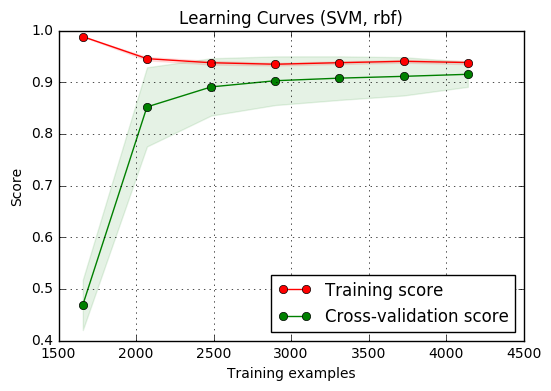

In [44]:
model = SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
plot_learning_curve(model, "Learning Curves (SVM, rbf)", X_scld, y, train_sizes=[.4, .5, .6, .7, .8, .9, 1], cv=10)
plt.show()

# Exercise 4
Repeat steps 1.a - 1.e for the car dataset. Notice that now features are categorical, not numerical.
- Find a suitable way to encode them
- How does this change our modeling strategy?

Also notice that the target variable `acceptability` has 4 classes. How do we encode them?


In [46]:
df = pd.read_csv('./../../assets/datasets/car.csv')
df.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [47]:
map_maint = {'vhigh': 4,'high': 3,'med': 2,'low':1}
map_doors = {'5more': 4,'4': 3,'3': 2,'2':1}
map_persons = {'more': 3,'4': 2,'2':1}
map_lug_boot = {'big': 3,'med': 2,'small':1}
map_safety = {'high': 3,'med': 2,'low':1}

df.maint = df.maint.map(map_maint)
df.buying = df.buying.map(map_maint)
df.doors = df.doors.map(map_doors)
df.persons = df.persons.map(map_persons)
df.lug_boot = df.lug_boot.map(map_lug_boot)
df.safety = df.safety.map(map_safety)

In [48]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,4,4,1,1,1,1,unacc
1,4,4,1,1,1,2,unacc
2,4,4,1,1,1,3,unacc
3,4,4,1,1,2,1,unacc
4,4,4,1,1,2,2,unacc


In [49]:
from sklearn.preprocessing import LabelEncoder
X = df.drop('acceptability', axis=1)
y = LabelEncoder().fit_transform(car['acceptability'])

In [54]:
X_stand = SS.fit_transform(X)
model=SVC()
do_cv(model,X_stand,y,cv=3)

Mean Cross Val Score with Std Dev:	0.811 ± 0.065


In [59]:
# do_cm_cr(model, X_stand, y, ['1','2','3','4'])
X_train, X_test, y_train, y_test = train_test_split(X_stand, y, stratify=y, test_size=0.33, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print cm
print classification_report(y_test,y_pred) 

[[118   0   9   0]
 [  5  18   0   0]
 [ 11   0 389   0]
 [  2   0   0  19]]
             precision    recall  f1-score   support

          0       0.87      0.93      0.90       127
          1       1.00      0.78      0.88        23
          2       0.98      0.97      0.97       400
          3       1.00      0.90      0.95        21

avg / total       0.95      0.95      0.95       571



In [60]:
model = SVC()
parameters = [{'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel':['linear','rbf']}]
do_grid_search(model, X_stand, y, parameters)

{'kernel': 'rbf', 'C': 10}
0.912615740741


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
model = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print cm
print classification_report(y_test,y_pred) 

[[121   0   6   0]
 [  0  23   0   0]
 [  8   0 392   0]
 [  0   1   0  20]]
             precision    recall  f1-score   support

          0       0.94      0.95      0.95       127
          1       0.96      1.00      0.98        23
          2       0.98      0.98      0.98       400
          3       1.00      0.95      0.98        21

avg / total       0.97      0.97      0.97       571



In [63]:
do_cv(model,X_stand,y,cv=3)
model.score(X_test,y_test)

Mean Cross Val Score with Std Dev:	0.811 ± 0.058


0.97373029772329245

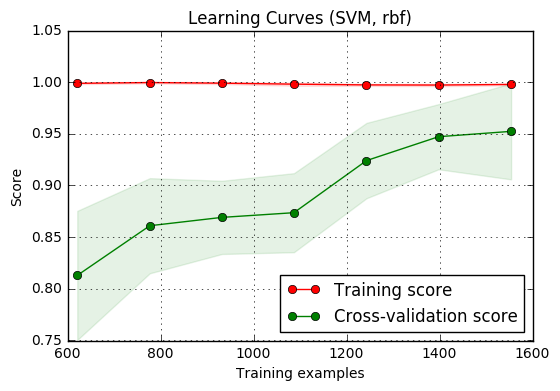

In [64]:
plot_learning_curve(model, "Learning Curves (SVM, rbf)", X_stand, y, train_sizes=[.4, .5, .6, .7, .8, .9, 1], cv=10)
plt.show()

# Bonus
Repeat steps 1.a - 1.e for the mushroom dataset. Notice that now features are categorical, not numerical. This dataset is quite large.
- How does this change our modeling strategy?
- Can we use feature selection to improve this?
